# Pandas Part 2 Assignment: Student Dataset
- Name: Khalid Salim
- Group: CAI3_AIS4_G1

## Importing Necessary Libraries

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading CSV File

In [2]:
df = pd.read_csv('bi.csv', encoding='latin1')
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


## Part 1 - Data Cleaning

### 1.1 Check Data Structure

In [3]:
df.shape

(77, 11)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fNAME          77 non-null     object 
 1   lNAME          77 non-null     object 
 2   Age            77 non-null     int64  
 3   gender         77 non-null     object 
 4   country        77 non-null     object 
 5   residence      77 non-null     object 
 6   entryEXAM      77 non-null     int64  
 7   prevEducation  77 non-null     object 
 8   studyHOURS     77 non-null     int64  
 9   Python         75 non-null     float64
 10  DB             77 non-null     int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 6.7+ KB


In [5]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


**Q: Which columns should be categorical and which should be numerical?**

**Answer:**

**Categorical:** gender, country, residence, prevEducation

**Numerical:** Age, entryEXAM, studyHOURS, Python, DB

### 1.2 Detect & fix inconsistent categories

In [6]:
df.head()

,fNAME,lNAME,Age,gender,country,residence,entryEXAM,prevEducation,studyHOURS,Python,DB
0,Christina,Binger,44,Female,Norway,Private,72,Masters,158,59.0,55
1,Alex,Walekhwa,60,M,Kenya,Private,79,Diploma,150,60.0,75
2,Philip,Leo,25,Male,Uganda,Sognsvann,55,HighSchool,130,74.0,50
3,Shoni,Hlongwane,22,F,Rsa,Sognsvann,40,High School,120,NaN,44
4,Maria,Kedibone,23,Female,South Africa,Sognsvann,65,High School,122,91.0,80


In [7]:
df['gender'].unique()

array(['Female', 'M', 'Male', 'F', 'female', 'male'], dtype=object)

In [8]:
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'Rsa', 'South Africa', 'Norge',
       'norway', 'Denmark', 'Netherlands', 'Italy', 'Spain', 'UK',
       'Somali', 'Nigeria', 'Germany', 'France'], dtype=object)

In [9]:
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'HighSchool', 'High School', 'Bachelors',
       'Barrrchelors', 'diploma', 'DIPLOMA', 'Diplomaaa', 'Doctorate'],
      dtype=object)

In [10]:
# fixing gender column by title() format
df['gender'] = df['gender'].str.title()
df['gender'].unique()

array(['Female', 'M', 'Male', 'F'], dtype=object)

In [11]:
# fixing gender column by replacing values
df['gender'] = df['gender'].replace({'M': 'Male', 'F': 'Female'})
df['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [12]:
# fixing country column
df['country'] = df['country'].str.title().replace({'Rsa': 'South Africa', 'Norge': 'Norway', 'Somali': 'Somalia'})
df['country'].unique()

array(['Norway', 'Kenya', 'Uganda', 'South Africa', 'Denmark',
       'Netherlands', 'Italy', 'Spain', 'Uk', 'Somalia', 'Nigeria',
       'Germany', 'France'], dtype=object)

In [13]:
# fixing prevEducation column
df['prevEducation'] = df['prevEducation'].str.title().replace({'Highschool': 'High School', 'Barrrchelors': 'Bachelors', 'Diplomaaa': 'Diploma'})
df['prevEducation'].unique()

array(['Masters', 'Diploma', 'High School', 'Bachelors', 'Doctorate'],
      dtype=object)

### 1.3 Handle duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

## Part 2 - Missing Data

### 2.1 Identify missing values

In [15]:
# Identify missing values
df.isnull().sum()

fNAME            0
lNAME            0
Age              0
gender           0
country          0
residence        0
entryEXAM        0
prevEducation    0
studyHOURS       0
Python           2
DB               0
dtype: int64

---
#### **Q&A**
**Q:** Question: Which columns are most affected by missing values?

**A:** Python column

---

In [16]:
df['Python'].unique()

array([59., 60., 74., nan, 91., 88., 80., 85., 83., 79., 70., 75., 87.,
       76., 84., 33., 30., 61., 82., 66., 81., 31., 90., 69., 57., 86.,
       78., 48., 45., 15., 63., 72.])

In [23]:
(df['Python'].isnull()).value_counts()

Python
False    75
True      2
Name: count, dtype: int64

### 2.2 Impute missing values

In [26]:
# Filling nulls in python column with median
df['Python'] = df['Python'].fillna(df['Python'].median())
df['Python'].unique()

array([59., 60., 74., 81., 91., 88., 80., 85., 83., 79., 70., 75., 87.,
       76., 84., 33., 30., 61., 82., 66., 31., 90., 69., 57., 86., 78.,
       48., 45., 15., 63., 72.])

## Part 3 - Outliers

### 3.1 Detect outliers

#### 3.1.2 Detect outliers using summary statistics ".describe() method"

In [42]:
df.describe()
df_stats = df.describe()
df_stats

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.987013,69.467532
std,10.341966,16.475784,12.743272,15.228517,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000


In [54]:
df_stats.loc['75%']-df_stats.loc['25%'] * 3.5

Age           -52.5
entryEXAM    -151.5
studyHOURS   -346.0
Python       -167.0
DB           -113.0
dtype: float64

In [55]:
# IQR = Q3 - Q1
# Lower Bound = Q1 - (1.5 * IQR)
# Upper Bound = Q3 + (1.5 * IQR)
df_stats.loc['l_bound'] = df_stats.loc['25%'] - 1.5 * (df_stats.loc['75%']-df_stats.loc['25%'])
df_stats.loc['u_bound'] = df_stats.loc['75%'] + 1.5 * (df_stats.loc['75%']-df_stats.loc['25%'])
df_stats

,Age,entryEXAM,studyHOURS,Python,DB
count,77.000000,77.000000,77.000000,77.000000,77.000000
mean,35.207792,76.753247,149.714286,75.987013,69.467532
std,10.341966,16.475784,12.743272,15.228517,17.033701
min,21.000000,28.000000,114.000000,15.000000,30.000000
25%,27.000000,69.000000,144.000000,72.000000,56.000000
50%,33.000000,80.000000,156.000000,81.000000,71.000000
75%,42.000000,90.000000,158.000000,85.000000,83.000000
max,71.000000,98.000000,160.000000,91.000000,100.000000
l_bound,4.500000,37.500000,123.000000,52.500000,15.500000
u_bound,64.500000,121.500000,179.000000,104.500000,123.500000


30

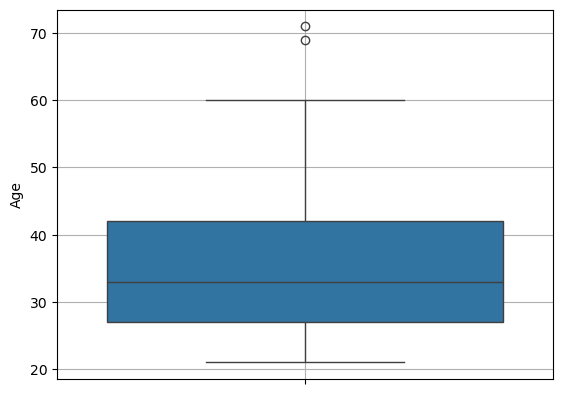

In [77]:
sns.boxplot(df['Age'])
#plt.ylim(0, 170)
plt.grid(True)
df['DB'].min()

{'whiskers': [<matplotlib.lines.Line2D at 0x148c4381450>,
 'caps': [<matplotlib.lines.Line2D at 0x148c43816d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x148c4381310>],
 'medians': [<matplotlib.lines.Line2D at 0x148c4381950>],
 'fliers': [<matplotlib.lines.Line2D at 0x148c4381a90>],
 'means': []}

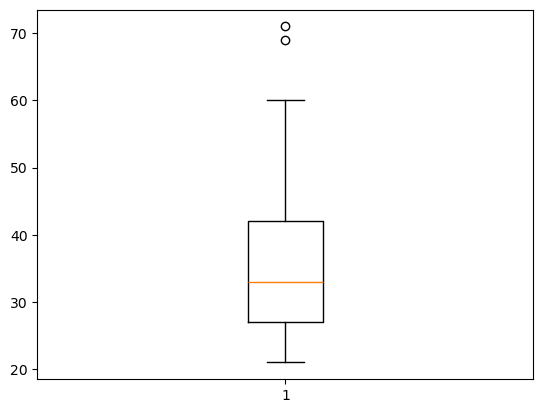

In [58]:
plt.boxplot(df['Age'])

In [65]:
print(list(df['Age']))

[44, 60, 25, 22, 23, 25, 27, 29, 31, 33, 34, 36, 38, 40, 42, 43, 45, 47, 48, 50, 22, 24, 26, 28, 30, 32, 35, 37, 39, 41, 44, 46, 71, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 22, 24, 26, 28, 30, 32, 21, 36, 38, 69, 42, 25, 46, 26, 50, 22, 23, 25, 27, 29, 31, 33, 35, 37, 39, 50, 43, 31, 33, 35, 31]
